In [1]:
cd

/home/luxx0489


In [36]:
# import packages
import numpy as np
import mne
import matplotlib.pyplot as plt
import pickle
import pycircstat


from scipy.stats import circmean,circvar,ttest_rel
from mne.preprocessing import ICA
from scipy.io import loadmat, savemat
from mne.viz import plot_evoked_topo, plot_evoked

In [3]:
data_path = './jupyter_projects/StreamingEEG_exp5/'

file_handle = open(data_path +'electrode_pos.obj','rb')
pos = pickle.load(file_handle)
file_handle.close()

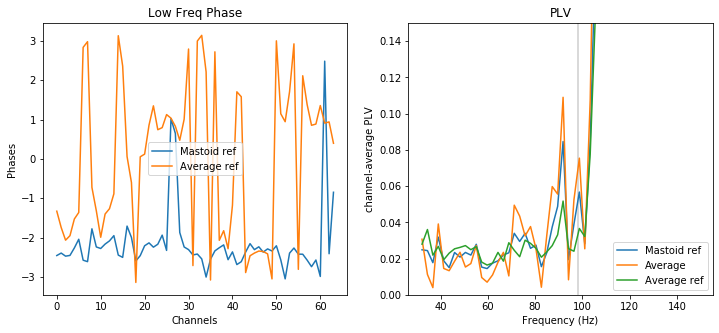

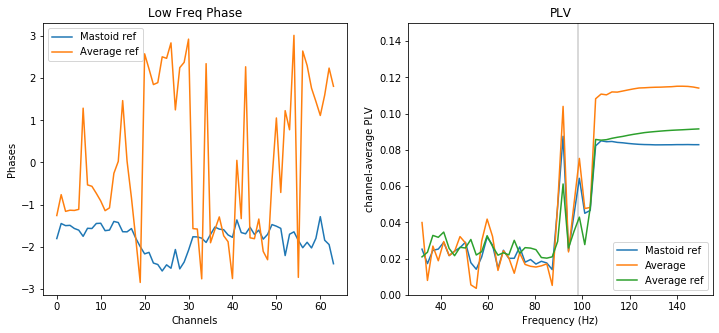

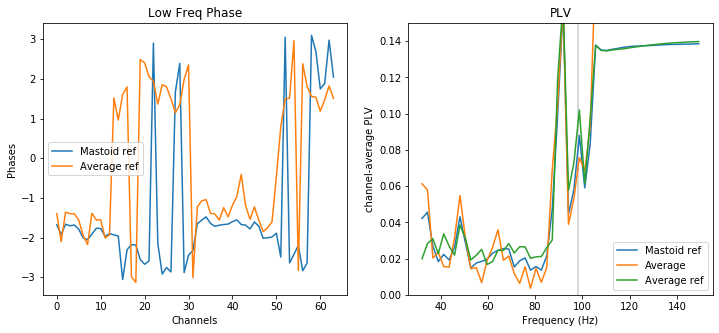

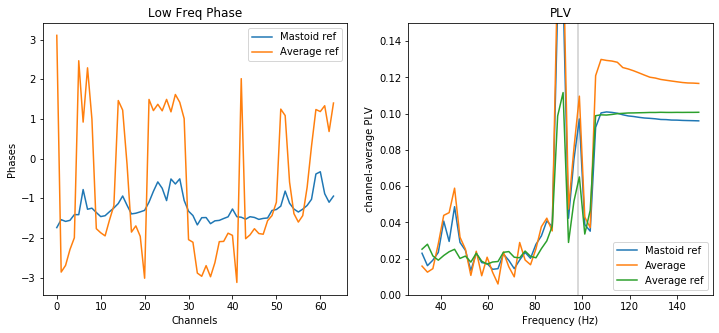

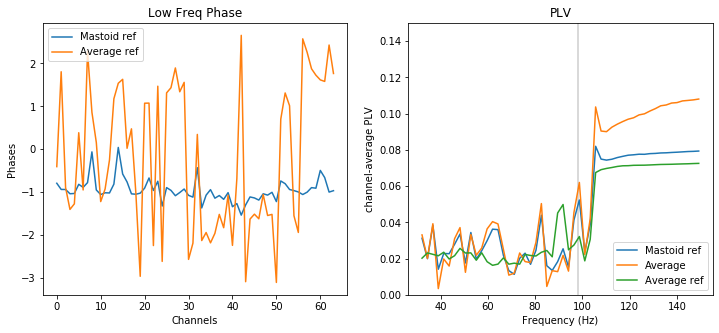

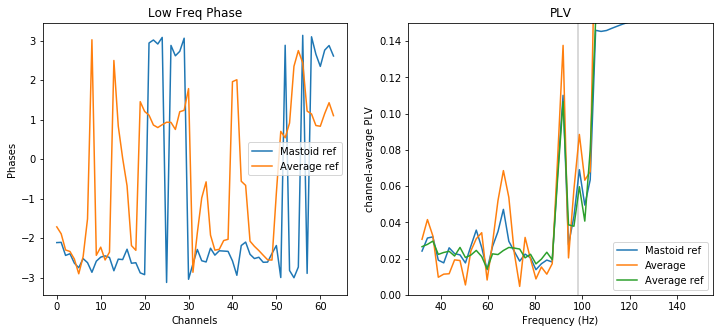

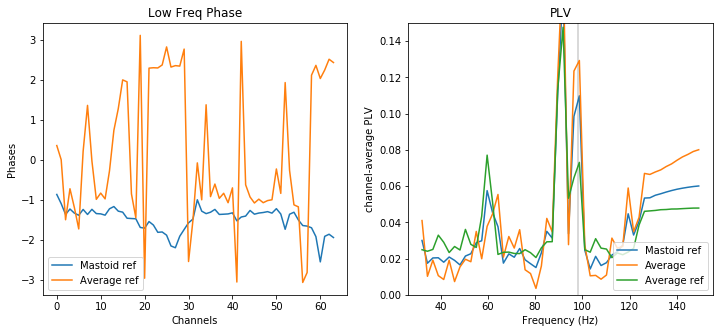

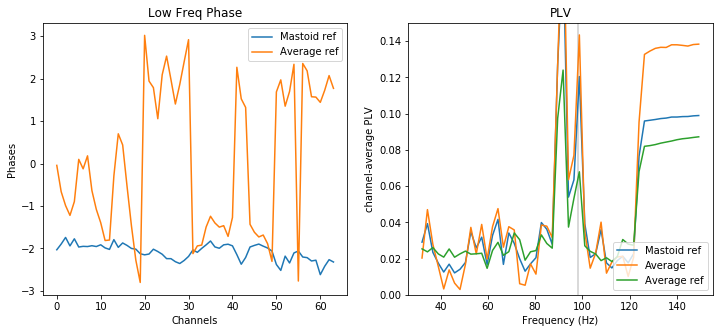

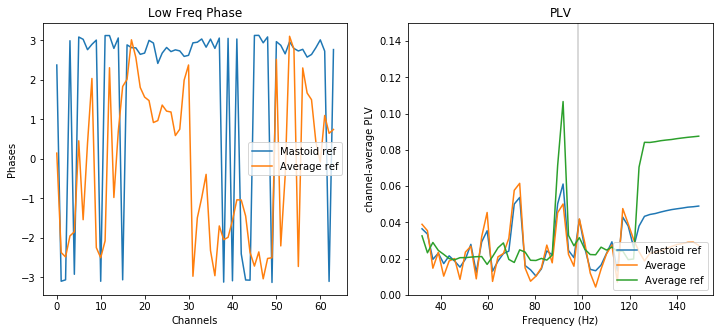

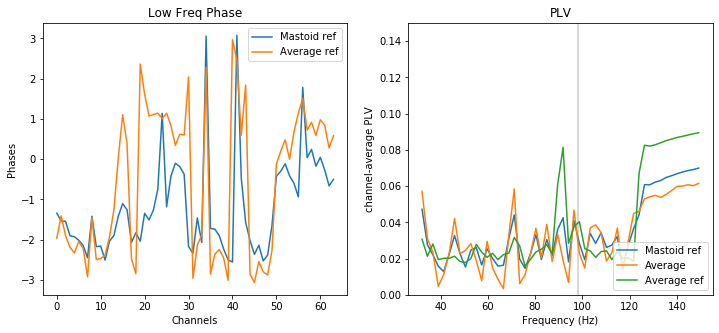

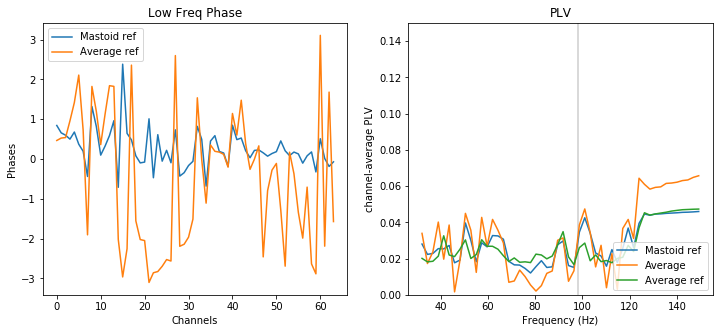

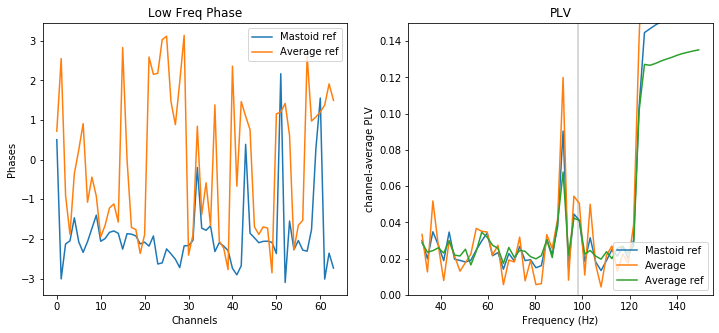

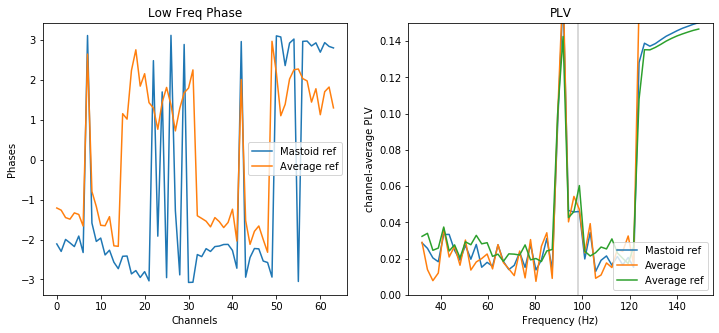

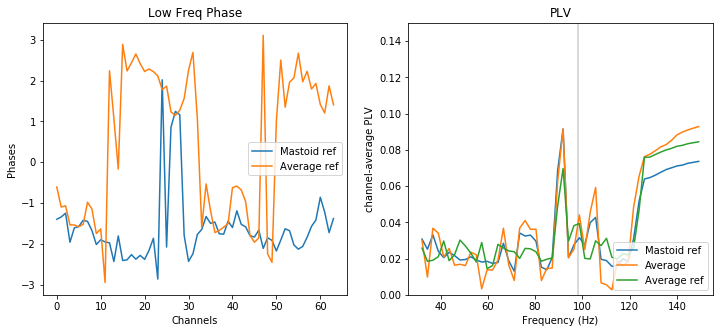

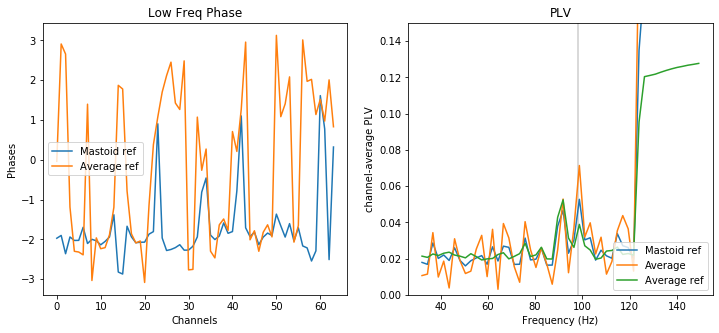

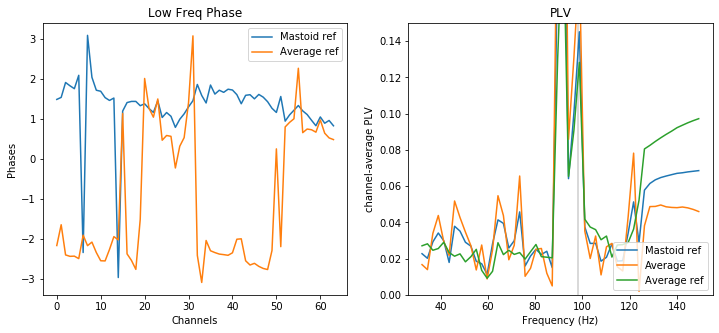

In [105]:
# load data

folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"

phase_mat = np.empty((2,16,64))
plv_mat = np.empty((3,16,52))
for iSubject in range(2,18):
    
    sub_id = 'Sub' + str(iSubject)
    mat_contents = loadmat(folder_path + sub_id+'/'+sub_id+'_TMR-5_MSK_LF_cleaned.mat')

    data = mat_contents['Merged_Data'][:,103:103+446,:]

    # FFT
    x=data.transpose(2,0,1)
    xw = np.fft.rfft(np.hamming(x.shape[2])*x, axis=2)
    xw = xw/abs(xw)
    freq = np.fft.rfftfreq(x.shape[2],1/1024)
    
    x_m = x.mean(1)
    xw_m = np.fft.rfft(np.hamming(x.shape[2])*x_m,axis=1)
    xw_m = xw_m/abs(xw_m)
    
    x_cr = (data-data.mean(0)).transpose(2,0,1)
    xw_cr = np.fft.rfft(np.hamming(x.shape[2])*x_cr,axis=2)
    xw_cr = xw_cr/abs(xw_cr)
    
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    
    index = np.argmin(abs(freq-98.28))
    plt.plot(np.angle(xw.mean(0)[:,index]),label='Mastoid ref')
    plt.plot(np.angle(xw_cr.mean(0)[:,index]),label='Average ref')

    plt.xlabel('Channels')
    plt.ylabel('Phases')
    plt.title('Low Freq Phase')
    plt.legend()

    # correct by average phase and ifft

    plv_1 = abs(xw.mean(0))
    plv_2 = abs(xw_m.mean(0))
    plv_3 = abs(xw_cr.mean(0))
    plt.subplot(1,2,2)
    passband = np.logical_and(freq>30,freq<150)
    plt.axvline(98.28,color='k',alpha=0.2)

    plt.plot(freq[passband],plv_1.mean(0)[passband],label='Mastoid ref')
    plt.plot(freq[passband],plv_2[passband],label='Average')
    plt.plot(freq[passband],plv_3.mean(0)[passband],label='Average ref')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('channel-average PLV')
    plt.title('PLV')
    plt.ylim(0,0.15)
    plt.legend(loc='lower right')
    
    index = np.argmin(abs(freq-98.28))
    phase_mat[0,iSubject-2,:] = np.angle(xw.mean(0)[:,index])
    phase_mat[1,iSubject-2,:] = np.angle(xw_cr.mean(0)[:,index])
    
    plv_mat[0,iSubject-2,:] = plv_1.mean(0)[passband]
    plv_mat[1,iSubject-2,:] = plv_2[passband]
    plv_mat[2,iSubject-2,:] = plv_3.mean(0)[passband]

In [22]:
phase_mat.shape

(2, 16, 64)

In [16]:
chann = np.empty(phase_mat[0,:,:].shape)

for i in range(64):
    chann[:,i]=i

In [24]:
pycircstat.watson_williams(phase_mat[0,:,0],phase_mat[0,:,1],phase_mat[0,:,2])

(0.8484037629996661,             df         SS        MS         F   p-value
 Source                                                 
 Columns    2.0   0.117590  0.058795  0.165001  0.848404
 Residual  45.0  20.264342  0.450319       NaN       NaN
 Total     47.0  20.381932       NaN       NaN       NaN)

In [29]:
for i in range(64):
    print('phase_mat[0,:,'+str(i)+'],')

phase_mat[0,:,0],
phase_mat[0,:,1],
phase_mat[0,:,2],
phase_mat[0,:,3],
phase_mat[0,:,4],
phase_mat[0,:,5],
phase_mat[0,:,6],
phase_mat[0,:,7],
phase_mat[0,:,8],
phase_mat[0,:,9],
phase_mat[0,:,10],
phase_mat[0,:,11],
phase_mat[0,:,12],
phase_mat[0,:,13],
phase_mat[0,:,14],
phase_mat[0,:,15],
phase_mat[0,:,16],
phase_mat[0,:,17],
phase_mat[0,:,18],
phase_mat[0,:,19],
phase_mat[0,:,20],
phase_mat[0,:,21],
phase_mat[0,:,22],
phase_mat[0,:,23],
phase_mat[0,:,24],
phase_mat[0,:,25],
phase_mat[0,:,26],
phase_mat[0,:,27],
phase_mat[0,:,28],
phase_mat[0,:,29],
phase_mat[0,:,30],
phase_mat[0,:,31],
phase_mat[0,:,32],
phase_mat[0,:,33],
phase_mat[0,:,34],
phase_mat[0,:,35],
phase_mat[0,:,36],
phase_mat[0,:,37],
phase_mat[0,:,38],
phase_mat[0,:,39],
phase_mat[0,:,40],
phase_mat[0,:,41],
phase_mat[0,:,42],
phase_mat[0,:,43],
phase_mat[0,:,44],
phase_mat[0,:,45],
phase_mat[0,:,46],
phase_mat[0,:,47],
phase_mat[0,:,48],
phase_mat[0,:,49],
phase_mat[0,:,50],
phase_mat[0,:,51],
phase_mat[0,:,52],
pha

In [30]:
pycircstat.watson_williams(phase_mat[0,:,0],
phase_mat[0,:,1],
phase_mat[0,:,2],
phase_mat[0,:,3],
phase_mat[0,:,4],
phase_mat[0,:,5],
phase_mat[0,:,6],
phase_mat[0,:,7],
phase_mat[0,:,8],
phase_mat[0,:,9],
phase_mat[0,:,10],
phase_mat[0,:,11],
phase_mat[0,:,12],
phase_mat[0,:,13],
phase_mat[0,:,14],
phase_mat[0,:,15],
phase_mat[0,:,16],
phase_mat[0,:,17],
phase_mat[0,:,18],
phase_mat[0,:,19],
phase_mat[0,:,20],
phase_mat[0,:,21],
phase_mat[0,:,22],
phase_mat[0,:,23],
phase_mat[0,:,24],
phase_mat[0,:,25],
phase_mat[0,:,26],
phase_mat[0,:,27],
phase_mat[0,:,28],
phase_mat[0,:,29],
phase_mat[0,:,30],
phase_mat[0,:,31],
phase_mat[0,:,32],
phase_mat[0,:,33],
phase_mat[0,:,34],
phase_mat[0,:,35],
phase_mat[0,:,36],
phase_mat[0,:,37],
phase_mat[0,:,38],
phase_mat[0,:,39],
phase_mat[0,:,40],
phase_mat[0,:,41],
phase_mat[0,:,42],
phase_mat[0,:,43],
phase_mat[0,:,44],
phase_mat[0,:,45],
phase_mat[0,:,46],
phase_mat[0,:,47],
phase_mat[0,:,48],
phase_mat[0,:,49],
phase_mat[0,:,50],
phase_mat[0,:,51],
phase_mat[0,:,52],
phase_mat[0,:,53],
phase_mat[0,:,54],
phase_mat[0,:,55],
phase_mat[0,:,56],
phase_mat[0,:,57],
phase_mat[0,:,58],
phase_mat[0,:,59],
phase_mat[0,:,60],
phase_mat[0,:,61],
phase_mat[0,:,62],
phase_mat[0,:,63]
                          )

(0.9999565832396005,               df          SS        MS         F   p-value
 Source                                                    
 Columns     63.0   10.538976  0.167285  0.439409  0.999957
 Residual   960.0  472.510058  0.492198       NaN       NaN
 Total     1023.0  483.049034       NaN       NaN       NaN)

In [31]:
for i in range(64):
    print('phase_mat[1,:,'+str(i)+'],')

phase_mat[1,:,0],
phase_mat[1,:,1],
phase_mat[1,:,2],
phase_mat[1,:,3],
phase_mat[1,:,4],
phase_mat[1,:,5],
phase_mat[1,:,6],
phase_mat[1,:,7],
phase_mat[1,:,8],
phase_mat[1,:,9],
phase_mat[1,:,10],
phase_mat[1,:,11],
phase_mat[1,:,12],
phase_mat[1,:,13],
phase_mat[1,:,14],
phase_mat[1,:,15],
phase_mat[1,:,16],
phase_mat[1,:,17],
phase_mat[1,:,18],
phase_mat[1,:,19],
phase_mat[1,:,20],
phase_mat[1,:,21],
phase_mat[1,:,22],
phase_mat[1,:,23],
phase_mat[1,:,24],
phase_mat[1,:,25],
phase_mat[1,:,26],
phase_mat[1,:,27],
phase_mat[1,:,28],
phase_mat[1,:,29],
phase_mat[1,:,30],
phase_mat[1,:,31],
phase_mat[1,:,32],
phase_mat[1,:,33],
phase_mat[1,:,34],
phase_mat[1,:,35],
phase_mat[1,:,36],
phase_mat[1,:,37],
phase_mat[1,:,38],
phase_mat[1,:,39],
phase_mat[1,:,40],
phase_mat[1,:,41],
phase_mat[1,:,42],
phase_mat[1,:,43],
phase_mat[1,:,44],
phase_mat[1,:,45],
phase_mat[1,:,46],
phase_mat[1,:,47],
phase_mat[1,:,48],
phase_mat[1,:,49],
phase_mat[1,:,50],
phase_mat[1,:,51],
phase_mat[1,:,52],
pha

In [32]:
pycircstat.watson_williams(phase_mat[1,:,0],
phase_mat[1,:,1],
phase_mat[1,:,2],
phase_mat[1,:,3],
phase_mat[1,:,4],
phase_mat[1,:,5],
phase_mat[1,:,6],
phase_mat[1,:,7],
phase_mat[1,:,8],
phase_mat[1,:,9],
phase_mat[1,:,10],
phase_mat[1,:,11],
phase_mat[1,:,12],
phase_mat[1,:,13],
phase_mat[1,:,14],
phase_mat[1,:,15],
phase_mat[1,:,16],
phase_mat[1,:,17],
phase_mat[1,:,18],
phase_mat[1,:,19],
phase_mat[1,:,20],
phase_mat[1,:,21],
phase_mat[1,:,22],
phase_mat[1,:,23],
phase_mat[1,:,24],
phase_mat[1,:,25],
phase_mat[1,:,26],
phase_mat[1,:,27],
phase_mat[1,:,28],
phase_mat[1,:,29],
phase_mat[1,:,30],
phase_mat[1,:,31],
phase_mat[1,:,32],
phase_mat[1,:,33],
phase_mat[1,:,34],
phase_mat[1,:,35],
phase_mat[1,:,36],
phase_mat[1,:,37],
phase_mat[1,:,38],
phase_mat[1,:,39],
phase_mat[1,:,40],
phase_mat[1,:,41],
phase_mat[1,:,42],
phase_mat[1,:,43],
phase_mat[1,:,44],
phase_mat[1,:,45],
phase_mat[1,:,46],
phase_mat[1,:,47],
phase_mat[1,:,48],
phase_mat[1,:,49],
phase_mat[1,:,50],
phase_mat[1,:,51],
phase_mat[1,:,52],
phase_mat[1,:,53],
phase_mat[1,:,54],
phase_mat[1,:,55],
phase_mat[1,:,56],
phase_mat[1,:,57],
phase_mat[1,:,58],
phase_mat[1,:,59],
phase_mat[1,:,60],
phase_mat[1,:,61],
phase_mat[1,:,62],
phase_mat[1,:,63]
                          )

(6.535922355053979e-155,
               df          SS        MS          F        p-value
 Source                                                          
 Columns     63.0  527.919911  8.379681  23.912552  6.535922e-155
 Residual   960.0  423.016657  0.440642        NaN            NaN
 Total     1023.0  950.936569       NaN        NaN            NaN)

Text(0.5, 1.0, 'Channel-average PLV at 98 Hz')

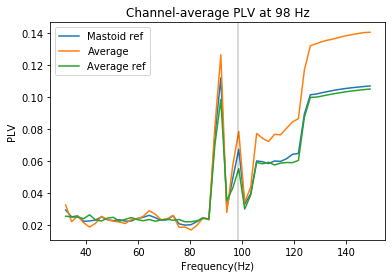

In [109]:
plt.plot(freq[passband],plv_mat[0,:,:].mean(0),label = 'Mastoid ref')
plt.plot(freq[passband],plv_mat[1,:,:].mean(0),label = 'Average')
plt.plot(freq[passband],plv_mat[2,:,:].mean(0),label = 'Average ref')
plt.legend()
plt.axvline(98.28,color='k',alpha=0.2)
plt.xlabel('Frequency(Hz)')
plt.ylabel('PLV')
plt.title('Channel-average PLV at 98 Hz')

In [42]:
p1.mean()

0.06741189778777497

In [40]:
index = np.argmin(abs(freq[passband]-98.28))
p1 = plv_mat[0,:,index]
p2 = plv_mat[2,:,index]

ttest_rel(p1,p2)

Ttest_relResult(statistic=2.548745073645447, pvalue=0.022253261047848957)

In [60]:
phase_m1 = [circmean(phase_mat[0,:,i],high=np.pi,low=-np.pi) for i in range(64)]


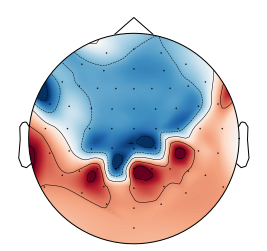

(<matplotlib.image.AxesImage at 0x7f0e84605850>,
 <matplotlib.contour.QuadContourSet at 0x7f0e84638190>)

In [61]:
phase_m2 = [circmean(phase_mat[1,:,i],high=np.pi,low=-np.pi) for i in range(64)]
mne.viz.plot_topomap(phase_m2,pos)

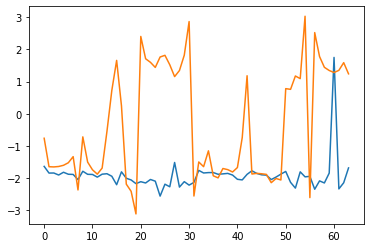

In [62]:
plt.plot(phase_m1)
plt.plot(phase_m2)

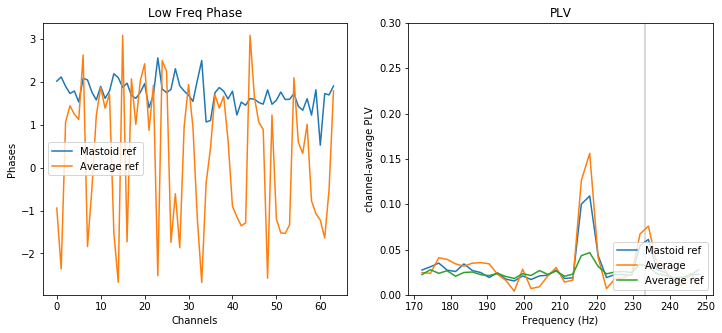

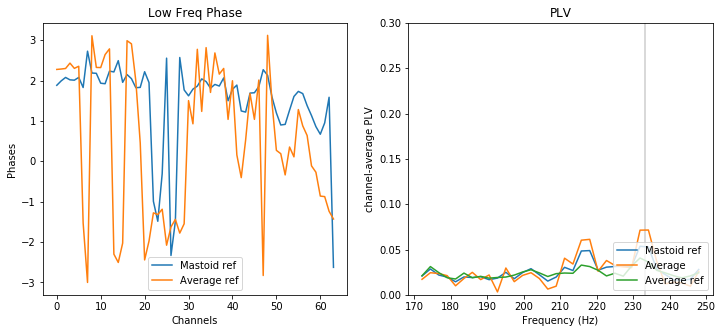

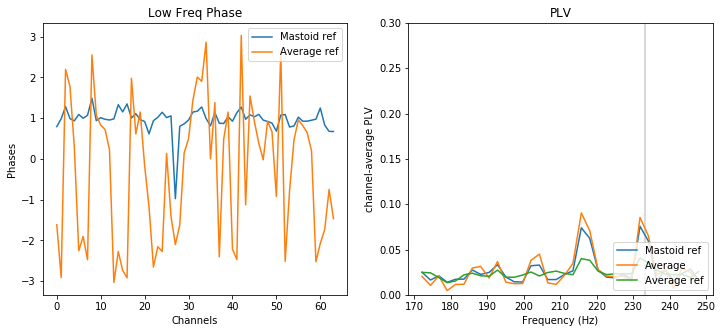

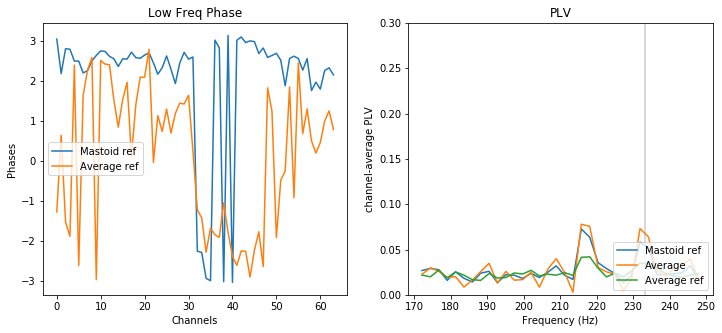

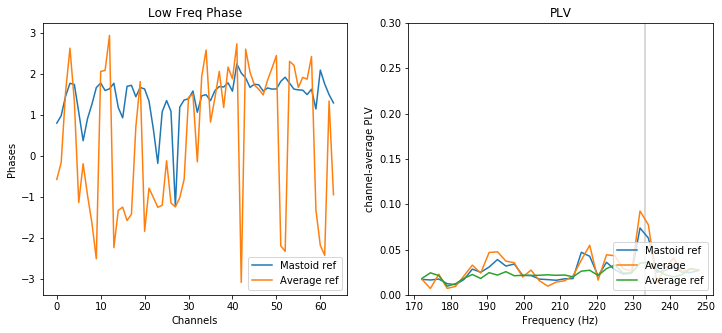

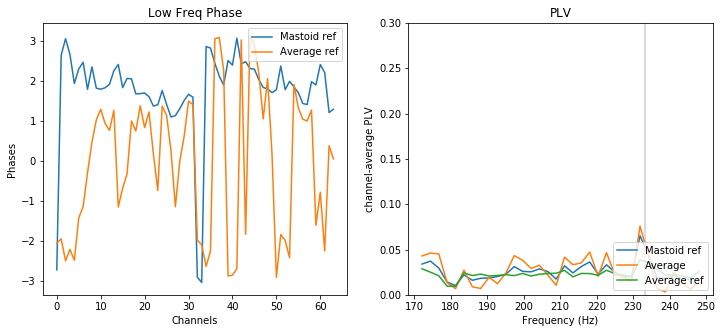

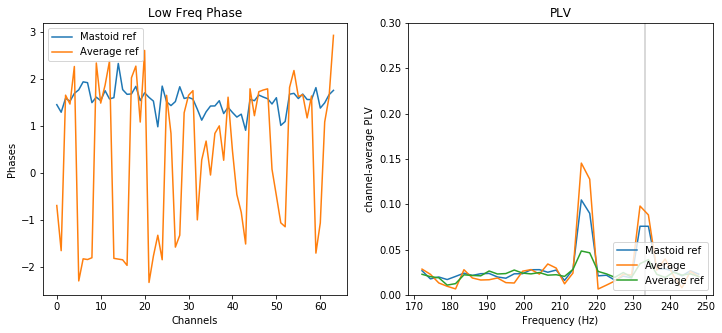

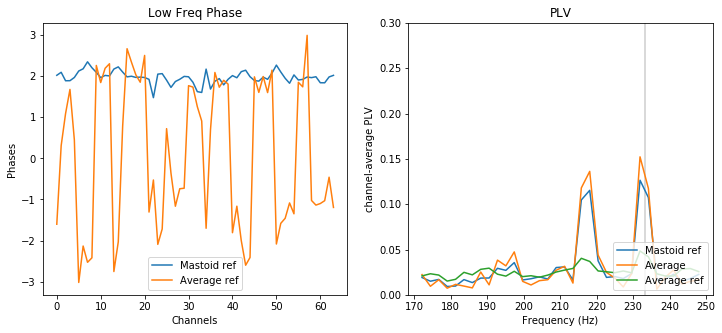

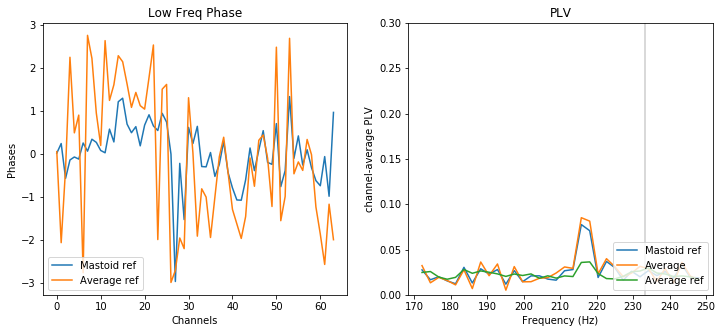

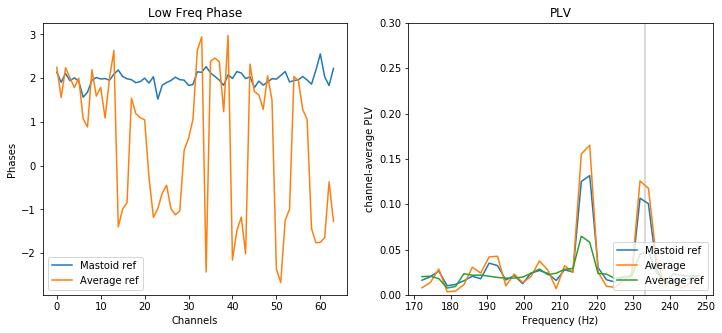

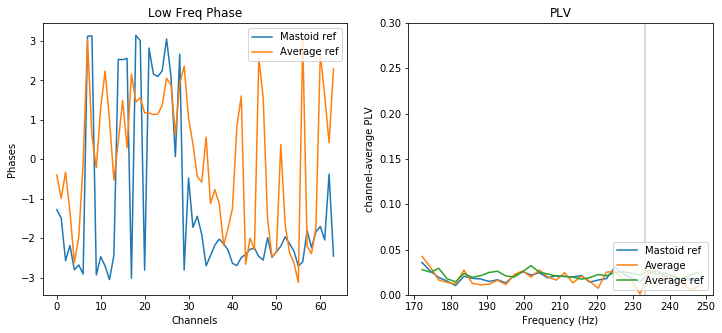

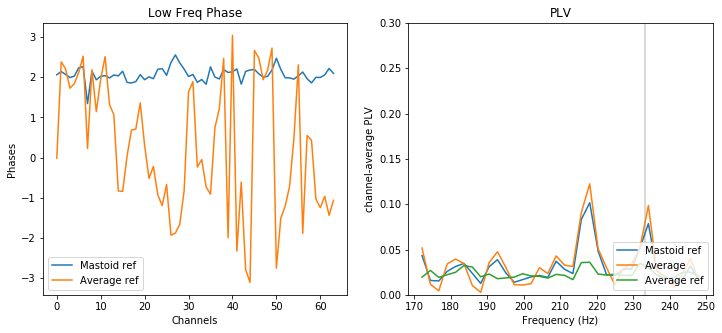

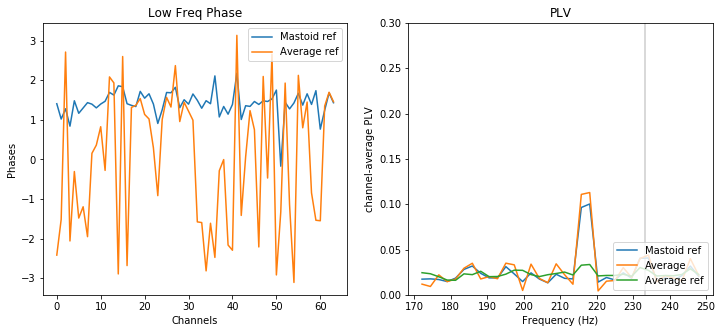

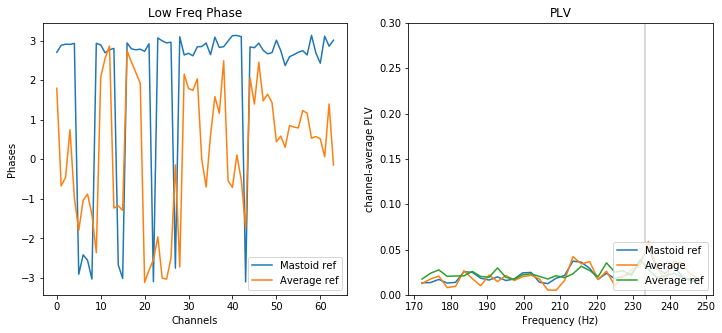

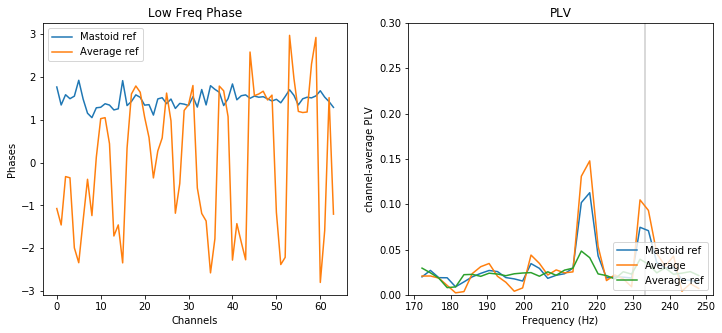

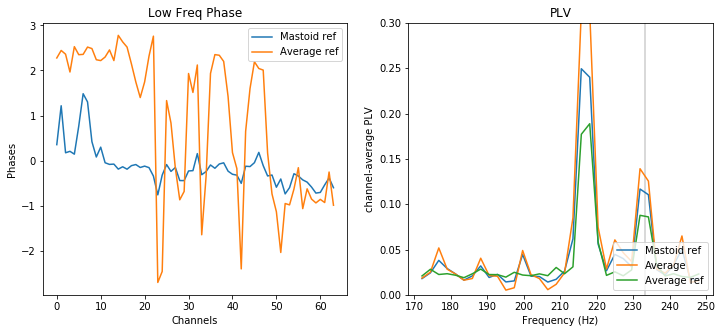

In [111]:
# load data

folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"

phase_mat = np.empty((2,16,64))
plv_mat = np.empty((3,16,34))
for iSubject in range(2,18):
    
    sub_id = 'Sub' + str(iSubject)
    mat_contents = loadmat(folder_path + sub_id+'/'+sub_id+'_TMR-5_MSK_HF_cleaned.mat')

    data = mat_contents['Merged_Data'][:,103:103+446,:]

    # FFT
    x=data.transpose(2,0,1)
    xw = np.fft.rfft(np.hamming(x.shape[2])*x, axis=2)
    xw = xw/abs(xw)
    freq = np.fft.rfftfreq(x.shape[2],1/1024)
    
    x_m = x.mean(1)
    xw_m = np.fft.rfft(np.hamming(x.shape[2])*x_m,axis=1)
    xw_m = xw_m/abs(xw_m)
    
    x_cr = (data-data.mean(0)).transpose(2,0,1)
    xw_cr = np.fft.rfft(np.hamming(x.shape[2])*x_cr,axis=2)
    xw_cr = xw_cr/abs(xw_cr)
    
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    
    index = np.argmin(abs(freq-233.13))
    plt.plot(np.angle(xw.mean(0)[:,index]),label='Mastoid ref')
    plt.plot(np.angle(xw_cr.mean(0)[:,index]),label='Average ref')

    plt.xlabel('Channels')
    plt.ylabel('Phases')
    plt.title('Low Freq Phase')
    plt.legend()

    # correct by average phase and ifft

    plv_1 = abs(xw.mean(0))
    plv_2 = abs(xw_m.mean(0))
    plv_3 = abs(xw_cr.mean(0))
    plt.subplot(1,2,2)
    passband = np.logical_and(freq>170,freq<250)
    plt.axvline(233.13,color='k',alpha=0.2)

    plt.plot(freq[passband],plv_1.mean(0)[passband],label='Mastoid ref')
    plt.plot(freq[passband],plv_2[passband],label='Average')
    plt.plot(freq[passband],plv_3.mean(0)[passband],label='Average ref')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('channel-average PLV')
    plt.title('PLV')
    plt.ylim(0,0.3)
    plt.legend(loc='lower right')
    
    index = np.argmin(abs(freq-233.13))
    phase_mat[0,iSubject-2,:] = np.angle(xw.mean(0)[:,index])
    phase_mat[1,iSubject-2,:] = np.angle(xw_cr.mean(0)[:,index])
    
    plv_mat[0,iSubject-2,:] = plv_1.mean(0)[passband]
    plv_mat[1,iSubject-2,:] = plv_2[passband]
    plv_mat[2,iSubject-2,:] = plv_3.mean(0)[passband]

Text(0.5, 1.0, 'Channel-average PLV at 233 Hz')

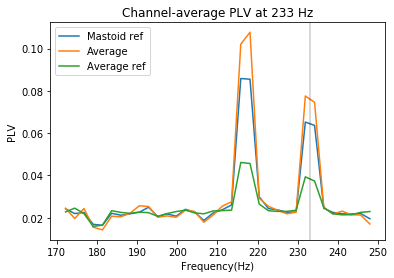

In [114]:
plt.plot(freq[passband],plv_mat[0,:,:].mean(0),label = 'Mastoid ref')
plt.plot(freq[passband],plv_mat[1,:,:].mean(0),label = 'Average')
plt.plot(freq[passband],plv_mat[2,:,:].mean(0),label = 'Average ref')
plt.legend()
plt.axvline(233.13,color='k',alpha=0.2)
plt.xlabel('Frequency(Hz)')
plt.ylabel('PLV')
plt.title('Channel-average PLV at 233 Hz')

In [113]:
index = np.argmin(abs(freq[passband]-233.13))
p1 = plv_mat[0,:,index]
p2 = plv_mat[2,:,index]

ttest_rel(p1,p2)

Ttest_relResult(statistic=5.575889597937095, pvalue=5.298021372107782e-05)

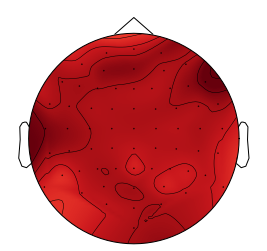

(<matplotlib.image.AxesImage at 0x7f0e84638790>,
 <matplotlib.contour.QuadContourSet at 0x7f0e7efdb190>)

In [65]:
phase_m3 = [circmean(phase_mat[0,:,i],high=np.pi,low=-np.pi) for i in range(64)]
mne.viz.plot_topomap(phase_m3,pos)

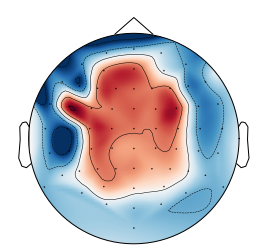

(<matplotlib.image.AxesImage at 0x7f0e7efdbb10>,
 <matplotlib.contour.QuadContourSet at 0x7f0e7e8cc5d0>)

In [66]:
phase_m4 = [circmean(phase_mat[1,:,i],high=np.pi,low=-np.pi) for i in range(64)]
mne.viz.plot_topomap(phase_m4,pos)

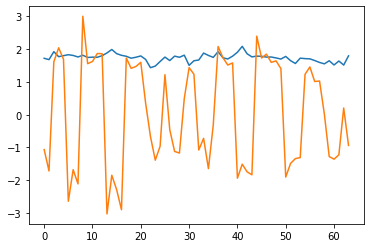

In [68]:
plt.plot(phase_m3)
plt.plot(phase_m4)

In [89]:
pycircstat.watson_williams(phase_mat[0,:,0],
phase_mat[0,:,1],
phase_mat[0,:,2],
phase_mat[0,:,3],
phase_mat[0,:,4],
phase_mat[0,:,5],
phase_mat[0,:,6],
phase_mat[0,:,7],
phase_mat[0,:,8],
phase_mat[0,:,9],
phase_mat[0,:,10],
phase_mat[0,:,11],
phase_mat[0,:,12],
phase_mat[0,:,13],
phase_mat[0,:,14],
phase_mat[0,:,15],
phase_mat[0,:,16],
phase_mat[0,:,17],
phase_mat[0,:,18],
phase_mat[0,:,19],
phase_mat[0,:,20],
phase_mat[0,:,21],
phase_mat[0,:,22],
phase_mat[0,:,23],
phase_mat[0,:,24],
phase_mat[0,:,25],
phase_mat[0,:,26],
phase_mat[0,:,27],
phase_mat[0,:,28],
phase_mat[0,:,29],
phase_mat[0,:,30],
phase_mat[0,:,31],
phase_mat[0,:,32],
phase_mat[0,:,33],
phase_mat[0,:,34],
phase_mat[0,:,35],
phase_mat[0,:,36],
phase_mat[0,:,37],
phase_mat[0,:,38],
phase_mat[0,:,39],
phase_mat[0,:,40],
phase_mat[0,:,41],
phase_mat[0,:,42],
phase_mat[0,:,43],
phase_mat[0,:,44],
phase_mat[0,:,45],
phase_mat[0,:,46],
phase_mat[0,:,47],
phase_mat[0,:,48],
phase_mat[0,:,49],
phase_mat[0,:,50],
phase_mat[0,:,51],
phase_mat[0,:,52],
phase_mat[0,:,53],
phase_mat[0,:,54],
phase_mat[0,:,55],
phase_mat[0,:,56],
phase_mat[0,:,57],
phase_mat[0,:,58],
phase_mat[0,:,59],
phase_mat[0,:,60],
phase_mat[0,:,61],
phase_mat[0,:,62],
phase_mat[0,:,63]
                          )

(0.9999999999920237,               df          SS        MS         F  p-value
 Source                                                   
 Columns     63.0    4.317796  0.068536  0.214589      1.0
 Residual   960.0  376.326645  0.392007       NaN      NaN
 Total     1023.0  380.644441       NaN       NaN      NaN)

In [90]:
pycircstat.watson_williams(phase_mat[1,:,0],
phase_mat[1,:,1],
phase_mat[1,:,2],
phase_mat[1,:,3],
phase_mat[1,:,4],
phase_mat[1,:,5],
phase_mat[1,:,6],
phase_mat[1,:,7],
phase_mat[1,:,8],
phase_mat[1,:,9],
phase_mat[1,:,10],
phase_mat[1,:,11],
phase_mat[1,:,12],
phase_mat[1,:,13],
phase_mat[1,:,14],
phase_mat[1,:,15],
phase_mat[1,:,16],
phase_mat[1,:,17],
phase_mat[1,:,18],
phase_mat[1,:,19],
phase_mat[1,:,20],
phase_mat[1,:,21],
phase_mat[1,:,22],
phase_mat[1,:,23],
phase_mat[1,:,24],
phase_mat[1,:,25],
phase_mat[1,:,26],
phase_mat[1,:,27],
phase_mat[1,:,28],
phase_mat[1,:,29],
phase_mat[1,:,30],
phase_mat[1,:,31],
phase_mat[1,:,32],
phase_mat[1,:,33],
phase_mat[1,:,34],
phase_mat[1,:,35],
phase_mat[1,:,36],
phase_mat[1,:,37],
phase_mat[1,:,38],
phase_mat[1,:,39],
phase_mat[1,:,40],
phase_mat[1,:,41],
phase_mat[1,:,42],
phase_mat[1,:,43],
phase_mat[1,:,44],
phase_mat[1,:,45],
phase_mat[1,:,46],
phase_mat[1,:,47],
phase_mat[1,:,48],
phase_mat[1,:,49],
phase_mat[1,:,50],
phase_mat[1,:,51],
phase_mat[1,:,52],
phase_mat[1,:,53],
phase_mat[1,:,54],
phase_mat[1,:,55],
phase_mat[1,:,56],
phase_mat[1,:,57],
phase_mat[1,:,58],
phase_mat[1,:,59],
phase_mat[1,:,60],
phase_mat[1,:,61],
phase_mat[1,:,62],
phase_mat[1,:,63]
                          )

/home/luxx0489/.conda/envs/mne/lib/python3.7/site-packages/pycircstat/tests.py:417: UserWarning: Test not applicable. Average resultant vector length < 0.45.
  'Test not applicable. Average resultant vector length < 0.45.')


(1.3935586589803209e-90,
               df          SS        MS          F       p-value
 Source                                                         
 Columns     63.0  354.268818  5.623315  13.008148  1.393559e-90
 Residual   960.0  574.386964  0.598320        NaN           NaN
 Total     1023.0  928.655782       NaN        NaN           NaN)

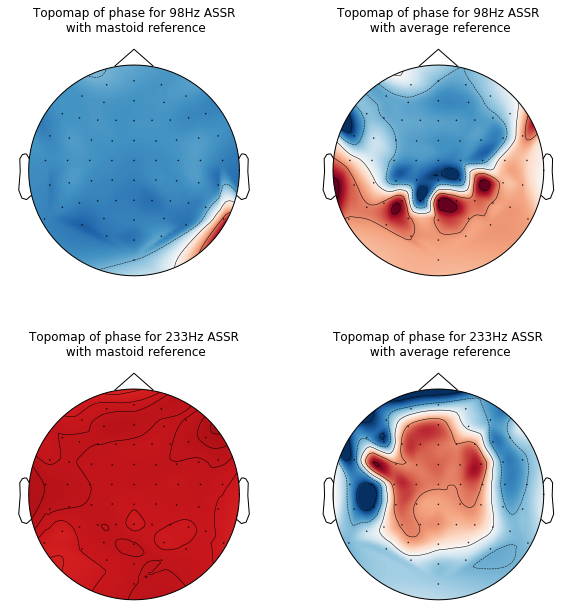

In [71]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
mne.viz.plot_topomap(phase_m1,pos,axes=ax[0,0],vmin=-np.pi,vmax=np.pi,show=False)
ax[0,0].set(title='Topomap of phase for 98Hz ASSR\n with mastoid reference')

mne.viz.plot_topomap(phase_m2,pos,axes=ax[0,1],vmin=-np.pi,vmax=np.pi,show=False)
ax[0,1].set(title='Topomap of phase for 98Hz ASSR\n with average reference')

mne.viz.plot_topomap(phase_m3,pos,axes=ax[1,0],vmin=-np.pi,vmax=np.pi,show=False)
ax[1,0].set(title='Topomap of phase for 233Hz ASSR\n with mastoid reference')

mne.viz.plot_topomap(phase_m4,pos,axes=ax[1,1],vmin=-np.pi,vmax=np.pi,show=False)
ax[1,1].set(title='Topomap of phase for 233Hz ASSR\n with average reference')
fig.show()

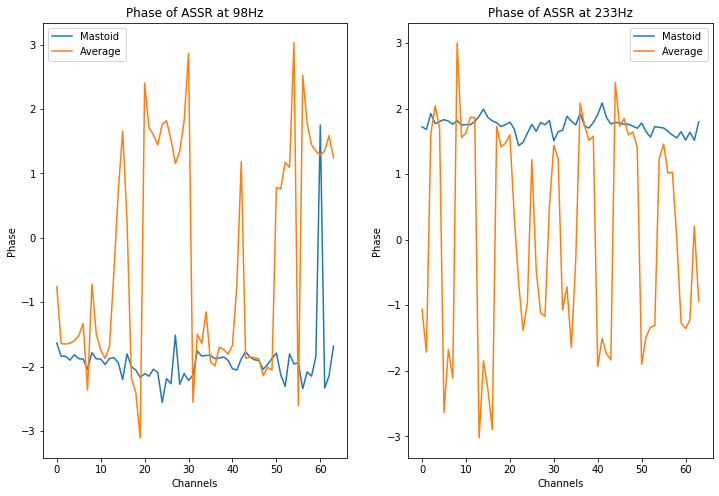

In [88]:
fig,ax=plt.subplots(1,2,figsize=(12,8))
ax[0].plot(phase_m1,label='Mastoid')
ax[0].plot(phase_m2,label='Average')
ax[0].set_ylabel('Phase')
ax[0].set_xlabel('Channels')
ax[0].set_title('Phase of ASSR at 98Hz')
ax[0].legend()

ax[1].plot(phase_m3,label='Mastoid')
ax[1].plot(phase_m4,label='Average')
ax[1].set_ylabel('Phase')
ax[1].set_xlabel('Channels')
ax[1].set_title('Phase of ASSR at 233Hz')
ax[1].legend()

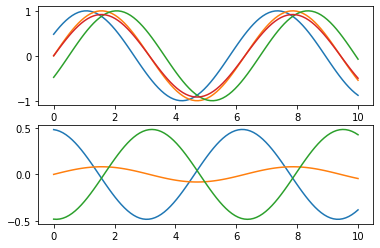

In [103]:
plt.subplot(2,1,1)
x = np.linspace(0,10,100)
y1 = np.sin(x+0.5)
y2 = np.sin(x)
y3 = np.sin(x-0.5)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)

y_ave = (y1+y2+y3)/3
plt.plot(x,y_ave)

plt.subplot(2,1,2)
x = np.linspace(0,10,100)

plt.plot(x,y1-y_ave)
plt.plot(x,y2-y_ave)
plt.plot(x,y3-y_ave)


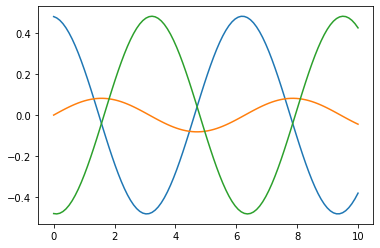

In [101]:
x = np.linspace(0,10,100)

plt.plot(x,y1-y_ave)
plt.plot(x,y2-y_ave)
plt.plot(x,y3-y_ave)
